In [1]:
pip install EMD-signal

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn
from PyEMD import EEMD
from sklearn.preprocessing import StandardScaler, MinMaxScaler
mm = MinMaxScaler()
ss = StandardScaler()

In [3]:
date_parser = lambda x: pd.to_datetime(x, format='%d-%m-%Y')
df = pd.read_csv('/content/9_Tekra.csv', index_col='Date', parse_dates=True, date_parser=date_parser)
# df.drop(columns=['Unnamed: 3'],inplace=True)
df.head()

,DO,Temp
Date,,
1990-05-31,6.5,25.0
1990-06-10,5.7,24.0
1990-06-20,6.9,24.4
1990-07-01,7.6,24.2
1990-07-20,7.2,25.0


In [4]:
df

,DO,Temp
Date,,
1990-05-31,6.5,25.0
1990-06-10,5.7,24.0
1990-06-20,6.9,24.4
1990-07-01,7.6,24.2
1990-07-20,7.2,25.0
...,...,...
2017-07-02,6.5,22.0
2017-07-31,6.2,24.0
2017-09-03,6.1,26.0


In [5]:
X_d = df.drop(columns='DO')
X_d = X_d.drop(columns='Temp')
X_d.shape

(598, 0)

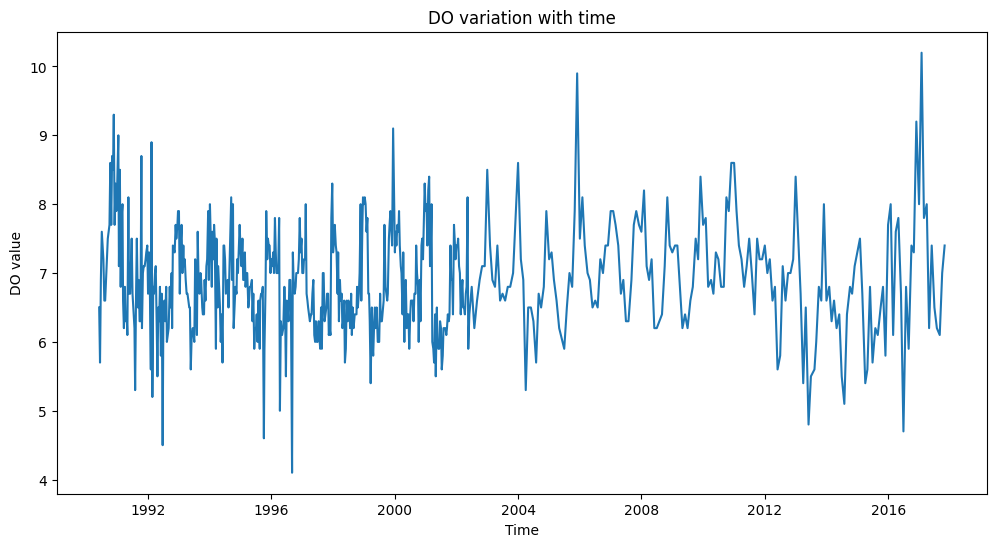

In [6]:
plt.figure(figsize=(12,6))
plt.plot(df.DO)
plt.xlabel("Time")
plt.ylabel("DO value")
plt.title("DO variation with time")
plt.savefig("initial_plot.png", dpi=500)
plt.show();

In [7]:
values = df.values

In [8]:
dfnew = pd.DataFrame(df)
do = dfnew['DO']

In [9]:
DO = []
for i in range(0, len(do)):
    DO.append([do[i]])

In [10]:
DO = np.array(DO)
DO.shape

(598, 1)

In [11]:
signal = DO.reshape(-1)

# EEMD decomposition
eemd = EEMD(trials = 200,noise_width=0.2)
eIMFs = eemd.eemd(signal, max_imf=7)

In [12]:
imfs, res = eemd.get_imfs_and_residue()

In [13]:
imfs.shape, res.shape

((8, 598), (598,))

In [14]:
ct=1
for i in imfs:
    tempdf = df
    tempdf['DO'] = i
    file_name = f"{ct}_data.csv"
    df.to_csv(file_name, index=False)
    ct = ct+1

In [15]:
tempdf = df
tempdf['DO'] = res
file_name = f"{9}_data.csv"
df.to_csv(file_name, index=False)

In [16]:
data = []

for i in range(imfs.shape[1]):
    val = 0
    for j in range(imfs.shape[0]):
        val += imfs[j][i]
    val += res[i]
    data.append(val)

data = np.array(data)

In [17]:
data[:10]

array([6.5, 5.7, 6.9, 7.6, 7.2, 6.6, 6.6, 7.5, 7.6, 7.7])

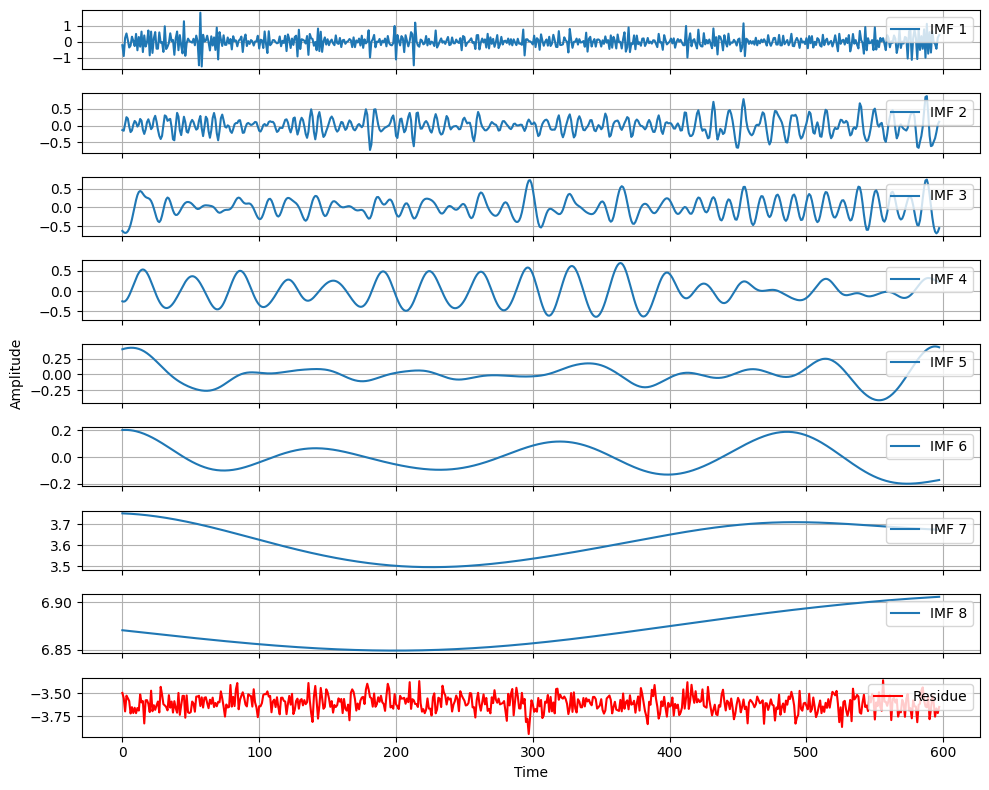

In [18]:
num_imfs = imfs.shape[0]
fig, axes = plt.subplots(num_imfs + 1, 1, figsize=(10, 8), sharex=True)

plt.subplots_adjust(hspace=0.5, right=6.0)
# Plot EMFs
for i in range(num_imfs):
    axes[i].plot(imfs[i])
    if i==4:
      axes[i].set_ylabel('Amplitude')
    axes[i].grid(True)
    axes[i].legend([f'IMF {i+1}'], loc='upper right')

# Plot residue
axes[num_imfs].plot(res, color='red')
axes[num_imfs].set_xlabel('Time')
axes[num_imfs].grid(True)
axes[num_imfs].legend(['Residue'], loc='upper right')


plt.tight_layout()
plt.show()